# ERCA 2024 mini-paper group 5: Snow?

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Introduction
How has snow depth and snow fall evolved in differnent towns in Germany?

In [5]:
path_to_data = r'Data/data_monthly_DE_DWD.csv'
# read data
snow_data = pd.read_csv(path_to_data)
# snow depth (HS), depth of snowfall (HN, also denoted as fresh snow or snowfall), 
# snow water equivalent (SWE), snow cover area (SCA), and snow cover duration (SCD)
# look at Bondorf, Hohenpeissenberg and Zugspitze and Unterammergau

In [6]:
snow_data

,Name,year,month,HNsum,HSmean,HSmax,SCD1,SCD1gt,SCD10,SCD20,...,HSmean_gapfill,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill
0,Aach,1937,1,NaN,0.161290,5.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aach,1937,2,NaN,0.857143,10.0,5.0,5.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aach,1937,3,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aach,1937,4,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aach,1937,5,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532747,Zwiefalten,2008,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532748,Zwiefalten,2008,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532749,Zwiefalten,2008,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532750,Zwiefalten,2008,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.066667,1.0,9.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0


# monthly depth of snowfall (HNsum) over time for the 4 stations

In [36]:
snow_data_Bondorf = snow_data.where(snow_data.Name=='Bondorf').dropna()
snow_data_Unterammergau = snow_data.where(snow_data.Name=='Unterammergau').dropna()
snow_data_Zugspitze = snow_data.where(snow_data.Name=='Zugspitze').dropna()
snow_data_Hohenpeissenberg = snow_data.where(snow_data.Name=='Hohenpeissenberg').dropna()

snow_data_Zugspitze.month

531252    1.0
531253    2.0
531254    3.0
531255    4.0
531256    5.0
         ... 
531936    1.0
531937    2.0
531938    3.0
531939    4.0
531940    5.0
Name: month, Length: 689, dtype: float64

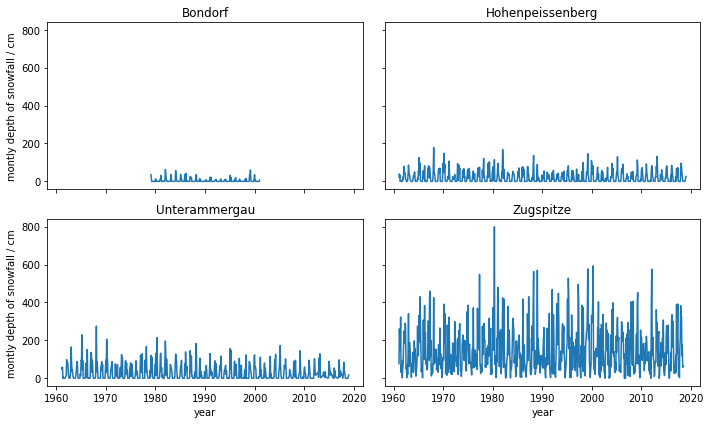

In [51]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,6), )
ax[0,0].set_title('Bondorf')
ax[0,0].plot(snow_data_Bondorf.year + snow_data_Bondorf.month/12, snow_data_Bondorf.HNsum, label='Bondorf')
ax[1,0].set_title('Unterammergau')
ax[1,0].plot(snow_data_Unterammergau.year + snow_data_Unterammergau.month/12, snow_data_Unterammergau.HNsum, label='Unterammergau')
ax[0,1].set_title('Hohenpeissenberg')
ax[0,1].plot(snow_data_Hohenpeissenberg.year + snow_data_Hohenpeissenberg.month/12, snow_data_Hohenpeissenberg.HNsum, label='Hohenpreissenberg')
ax[1,1].set_title('Zugspitze')
ax[1,1].plot(snow_data_Zugspitze.year + snow_data_Zugspitze.month/12, snow_data_Zugspitze.HNsum, label='Zugspitze')
ax[0,0].set_ylabel('montly depth of snowfall / cm')
ax[1,0].set_ylabel('montly depth of snowfall / cm')
ax[1,0].set_xlabel('year')
ax[1,1].set_xlabel('year')
plt.tight_layout()

## look at yearly snowfall
compute the sum over the monthly snowfall of each year and plot it against the year




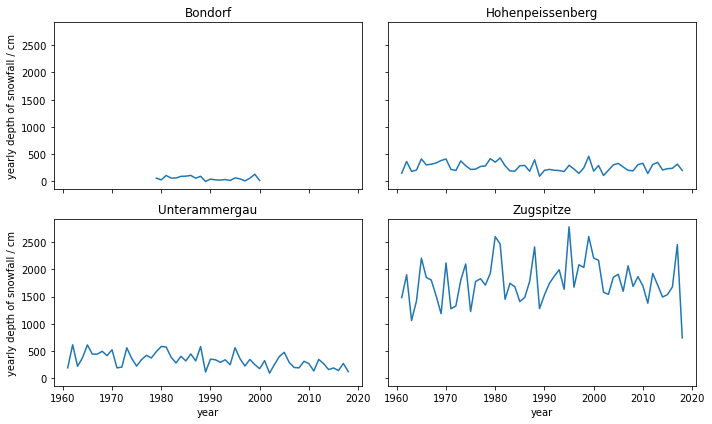

In [70]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,6) )
ax[0,0].set_title('Bondorf')
ax[0,0].plot(snow_data_Bondorf.groupby('year').sum().index, snow_data_Bondorf.groupby('year').sum().HNsum, label='Bondorf')
ax[1,0].set_title('Unterammergau')
ax[1,0].plot(snow_data_Unterammergau.groupby('year').sum().index, snow_data_Unterammergau.groupby('year').sum().HNsum, label='Unterammergau')
ax[0,1].set_title('Hohenpeissenberg')
ax[0,1].plot(snow_data_Hohenpeissenberg.groupby('year').sum().index, snow_data_Hohenpeissenberg.groupby('year').sum().HNsum, label='Hohenpreissenberg')
ax[1,1].set_title('Zugspitze')
ax[1,1].plot(snow_data_Zugspitze.groupby('year').sum().index, snow_data_Zugspitze.groupby('year').sum().HNsum, label='Zugspitze')
ax[0,0].set_ylabel('yearly depth of snowfall / cm')
ax[1,0].set_ylabel('yearly depth of snowfall / cm')
ax[1,0].set_xlabel('year')
ax[1,1].set_xlabel('year')
plt.tight_layout()

In [3]:
Bd = snow_data.where(snow_data.Name=='Bondorf').dropna()
Hpb = snow_data.where(snow_data.Name=='Hohenpeissenberg').dropna()
Zs = snow_data.where(snow_data.Name=='Zugspitze').dropna()
Uag = snow_data.where(snow_data.Name=='Unterammergau').dropna()

In [22]:
Bd_SCD = Bd.SCD10
Hpb_SCD = Hpb.SCD10
Zs_SCD = Zs.SCD10
Uag_SCD = Uag.SCD10

SCD means snow cover duration. The data containes many SCD-variables. The metadata nor the article explain anything about the different SCD variables, except "SCD was the number of days with HS above 1 cm". By interpretation I figured out that SCD1 is the number of days with HS above 1cm, SCD10 above 10cm, etc. Here SCD10 is used. The y-axis shows the days per month that the snow depth was higher than 10cm. This not necessarily means consecutive days.

C:\Users\gytham\AppData\Local\Temp\ipykernel_23612\1500829253.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


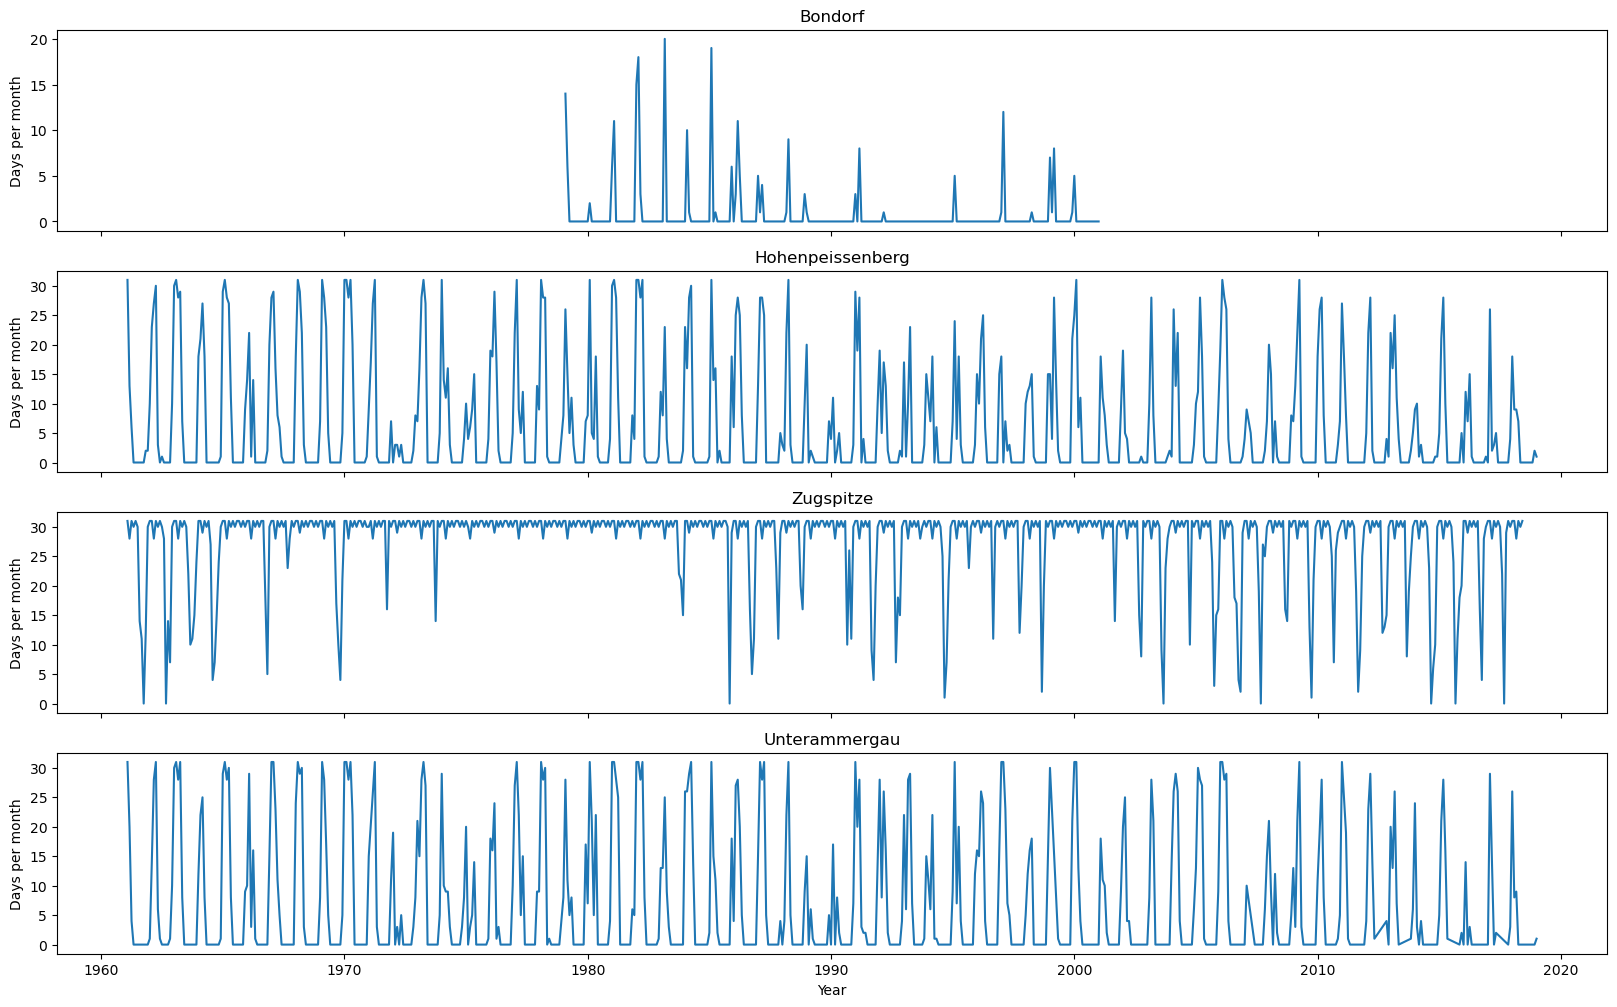

In [26]:
fig, ax = plt.subplots(4,sharex=True,figsize=(20,12))

ax[0].plot(Bd.year+Bd.month/12,Bd_SCD)
ax[0].set_title('Bondorf')
ax[0].set_ylabel('Days per month')
ax[1].plot(Hpb.year+Hpb.month/12,Hpb_SCD)
ax[1].set_title('Hohenpeissenberg')
ax[1].set_ylabel('Days per month')
ax[2].plot(Zs.year+Zs.month/12,Zs_SCD)
ax[2].set_title('Zugspitze')
ax[2].set_ylabel('Days per month')
ax[3].plot(Uag.year+Uag.month/12,Uag_SCD)
ax[3].set_title('Unterammergau')
ax[3].set_ylabel('Days per month')
ax[3].set_xlabel('Year')

fig.show()

In [11]:
plt.figure(figsize=(20,3))
plt.plot(Bd.year+Bd.month/12,Bd_SCD,label='Bondorf')
plt.plot(Hpb.year+Hpb.month/12,Hpb_SCD,label='Hohenpeissenberg')
plt.plot(Zs.year+Zs.month/12,Zs_SCD,label='Zugspitze')
plt.plot(Uag.year+Uag.month/12,Uag_SCD,label='Unterammergau')
plt.legend()
plt.grid()
plt.show()

AttributeError: 'Figure' object has no property 'subplots'